# blood pressure (bp) and whether or not the person diabetic type.

In [90]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

bp = pd.read_csv("bp.csv", sep=',', header = 0)

bp.head()

,bp,type
0,68,No
1,70,Yes
2,82,No
3,76,No
4,60,No


### Histogram of blonde pressure.

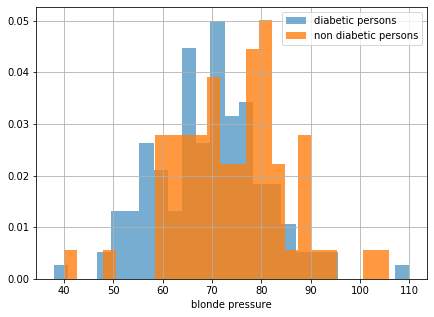

In [91]:
plt.figure(figsize=(7, 5))

bp[bp.type=='No']['bp'].hist(alpha=0.6,bins=25,label='diabetic persons', density=True)
bp[bp.type=='Yes']['bp'].hist(alpha=0.8,bins=25,label='non diabetic persons', density=True)

plt.xlabel('blonde pressure')
plt.legend()

### Boxplot of blonde pressure per type of person (with diabetic or no).

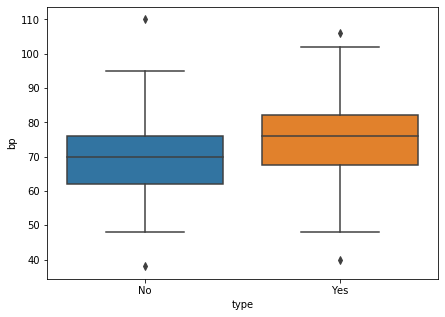

In [92]:
import seaborn as sns

plt.figure(figsize=(7, 5))
fig = sns.boxplot(x='type',y='bp',data=df)

### blood pressure dataframe for diabetic persons.

In [93]:
bp_yes = bp["type"] == 'Yes'
bp_yes = bp[bp_yes]

bp_yes.head()

,bp,type
1,70,Yes
5,76,Yes
9,78,Yes
10,40,Yes
12,60,Yes


In [94]:
bp_yes.describe()

,bp
count,68.000000
mean,74.588235
std,11.583874
min,40.000000
25%,67.500000
50%,76.000000
75%,82.000000
max,106.000000


### blood pressure dataframe for non diabetic persons.

In [95]:
bp_no = bp["type"] == 'No'
bp_no = bp[bp_no]

bp_no.head()

,bp,type
0,68,No
2,82,No
3,76,No
4,60,No
6,58,No


In [96]:
bp_no.describe()

,bp
count,132.000000
mean,69.545455
std,11.083557
min,38.000000
25%,62.000000
50%,70.000000
75%,76.000000
max,110.000000


## blood pressure T-test

In [97]:
stats.ttest_ind(bp_yes['bp'], bp_no['bp'])

Ttest_indResult(statistic=3.001495202122035, pvalue=0.0030323591864622732)

In [98]:
print('the difference is lower than 0.05, so the test is significant.')

the difference is lower than 0.05, so the test is significant.


## blood pressure Wilcoxon rank sums

In [99]:
stat, p = stats.ranksums(bp_yes['bp'], bp_no['bp'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=3.046, p=0.002


In [100]:
if (p > 0.05):
    
    print('probably the same distribution.')

else: 

    print('probably different distributions.')

probably different distributions.


## 95% confidence interval.

In [101]:
#diabetics.

bp_yes_array = (bp_yes['bp'],)
bootstrap_ci_diabetics = stats.bootstrap(bp_yes_array, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')
#IC 95% 
print(bootstrap_ci_diabetics.confidence_interval)

ConfidenceInterval(low=71.77941176470588, high=77.29411764705883)


In [102]:
#non diabetics.

bp_no_array = (bp_no['bp'],)
bootstrap_ci_non_diabetics = stats.bootstrap(bp_no_array, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')
#IC 95% 
print(bootstrap_ci_non_diabetics.confidence_interval)

ConfidenceInterval(low=67.6590909090909, high=71.47727272727273)


## Cohen D

In [103]:
from math import sqrt
 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

# calculate cohen's d
d = cohend(bp_yes['bp'], bp_no['bp'])
print('Cohens d: %.3f' % d)

Cohens d: 0.448


# paired dataframe.

In [104]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

paired = pd.read_csv("paired.csv", sep=',', header = 0)

paired.head()

,Clone,August,November
0,Balsam_Spire,8.1,11.2
1,Beaupre,10.0,16.3
2,Hazendans,16.5,15.3
3,Hoogvorst,13.6,15.6
4,Raspalje,9.5,10.5


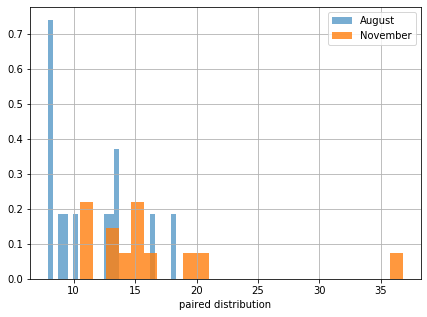

In [105]:
plt.figure(figsize=(7, 5))

paired['August'].hist(alpha=0.6,bins=25,label='August', density=True)
paired['November'].hist(alpha=0.8,bins=25,label='November', density=True)

plt.xlabel('paired distribution')
plt.legend()

In [106]:
paired.describe()

,August,November
count,13.000000,13.000000
mean,11.423077,16.323077
std,3.451607,6.886963
min,7.900000,10.500000
25%,8.300000,12.700000
50%,10.000000,15.300000
75%,13.400000,16.300000
max,18.300000,36.800000


## T-test paired.

In [107]:
stats.ttest_rel(paired['August'], paired['November'])

Ttest_relResult(statistic=-2.3088956550760438, pvalue=0.03955525086687241)

## Paired Wilcoxon Test.

In [108]:
stat, p = stats.wilcoxon(paired['August'], paired['November'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=16.000, p=0.040


In [109]:
if p > 0.05:
    
    print('probably the same distributions.')

else:
    print('probably different distributions.')

probably different distributions.
